In [50]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
from keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array 
import matplotlib.image as img
%matplotlib inline

In [2]:
cd C:/IBM_Project/venv/model/dataset/fruit-dataset/fruit-dataset/train


C:\IBM_Project\venv\model\dataset\fruit-dataset\fruit-dataset\train


In [3]:
ls


 Volume in drive C is WINDOWS
 Volume Serial Number is 8C55-EDE3

 Directory of C:\IBM_Project\venv\model\dataset\fruit-dataset\fruit-dataset\train

13-11-2022  22:46    <DIR>          .
13-11-2022  22:46    <DIR>          ..
04-11-2022  20:55    <DIR>          Apple___Black_rot
04-11-2022  20:56    <DIR>          Apple___healthy
04-11-2022  20:56    <DIR>          Corn_(maize)___healthy
04-11-2022  20:56    <DIR>          Corn_(maize)___Northern_Leaf_Blight
13-11-2022  22:49       221,536,688 fruit.h5
04-11-2022  20:56    <DIR>          Peach___Bacterial_spot
04-11-2022  20:56    <DIR>          Peach___healthy
               1 File(s)    221,536,688 bytes
               8 Dir(s)  103,041,548,288 bytes free


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
pwd

'C:\\IBM_Project\\venv\\model\\dataset\\fruit-dataset\\fruit-dataset\\train'

In [7]:
x_train=train_datagen.flow_from_directory(r"C:\IBM_Project\venv\model\dataset\fruit-dataset\fruit-dataset\train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [8]:
x_test=test_datagen.flow_from_directory(r"C:\IBM_Project\venv\model\dataset\fruit-dataset\fruit-dataset\train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [9]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,input_dim=4,activation='relu'))

In [14]:
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(6,activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
len(x_train)

225

In [27]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 101s 449ms/step - loss: 0.0867 - accuracy: 0.9697 - val_loss: 0.0540 - val_accuracy: 0.9809
Epoch 2/10
225/225 [==============================] - 82s 364ms/step - loss: 0.0702 - accuracy: 0.9736 - val_loss: 0.0496 - val_accuracy: 0.9790
Epoch 3/10
225/225 [==============================] - 82s 366ms/step - loss: 0.0620 - accuracy: 0.9781 - val_loss: 0.0444 - val_accuracy: 0.9848
Epoch 4/10
225/225 [==============================] - 82s 365ms/step - loss: 0.0495 - accuracy: 0.9809 - val_loss: 0.1857 - val_accuracy: 0.9309
Epoch 5/10
225/225 [==============================] - 82s 366ms/step - loss: 0.0743 - accuracy: 0.9751 - val_loss: 0.0325 - val_accuracy: 0.9898
Epoch 6/10
225/225 [==============================] - 82s 365ms/step - loss: 0.0423 - accuracy: 0.9851 - val_loss: 0.0217 - val_accuracy: 0.9931
Epoch 7/10
225/225 [==============================] - 82s 366ms/step - loss: 0.0494 - accuracy: 0.9822 - val_loss: 0.1272 - val_a

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 300)               18451500  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 6)                 906       
                                                        

In [29]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 8C55-EDE3

 Directory of C:\IBM_Project\venv\model\dataset\fruit-dataset\fruit-dataset\train

13-11-2022  22:46    <DIR>          .
13-11-2022  22:46    <DIR>          ..
04-11-2022  20:55    <DIR>          Apple___Black_rot
04-11-2022  20:56    <DIR>          Apple___healthy
04-11-2022  20:56    <DIR>          Corn_(maize)___healthy
04-11-2022  20:56    <DIR>          Corn_(maize)___Northern_Leaf_Blight
14-11-2022  08:21       222,037,720 fruit.h5
04-11-2022  20:56    <DIR>          Peach___Bacterial_spot
04-11-2022  20:56    <DIR>          Peach___healthy
               1 File(s)    222,037,720 bytes
               8 Dir(s)  102,415,417,344 bytes free


In [30]:
model.save('fruit.h5')

In [51]:
model=load_model('C:/IBM_Project/venv/model/dataset/fruit-dataset/fruit-dataset/train/fruit.h5')

In [54]:
img=image.load_img('C:/IBM_Project/venv/model/dataset/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047.JPG')

In [55]:
x=image.img_to_array(img)

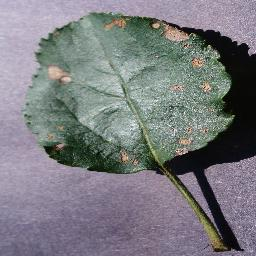

In [56]:
img

In [57]:
x

array([[[188., 180., 204.],
        [190., 182., 206.],
        [193., 185., 209.],
        ...,
        [158., 149., 168.],
        [196., 187., 206.],
        [189., 180., 199.]],

       [[189., 181., 205.],
        [190., 182., 206.],
        [192., 184., 208.],
        ...,
        [168., 159., 178.],
        [129., 120., 139.],
        [130., 121., 140.]],

       [[190., 182., 205.],
        [191., 183., 206.],
        [192., 184., 207.],
        ...,
        [147., 138., 157.],
        [142., 133., 152.],
        [169., 160., 179.]],

       ...,

       [[103.,  98., 121.],
        [106., 101., 124.],
        [110., 105., 128.],
        ...,
        [115., 107., 130.],
        [100.,  92., 116.],
        [134., 126., 150.]],

       [[105., 100., 123.],
        [108., 103., 126.],
        [113., 108., 131.],
        ...,
        [120., 112., 135.],
        [131., 123., 147.],
        [128., 120., 144.]],

       [[109., 104., 127.],
        [113., 108., 131.],
        [117., 1